<a href="https://colab.research.google.com/github/speedzik/Energy_Companies/blob/main/Energy_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polish Energy Moguls - Comparative Analysis of Major Energy Companies

created by Jakub Pydzik



*   [Github](https://github.com/speedzik)
*   [Linkedin](https://www.linkedin.com/in/jakub-pydzik-70a050237/)



 **In the ever-evolving energy landscape of Poland, four regional powerhouses:**

*  Polska Grupa Energetyczna **(PGE)**
*  Tauron Polska Energia **(TPE)**
*  Energa SA **(ENG)**
*  ENEA SA **(ENA)**

Emerge as pivotal contributors not only to the nation's power sector but also to the regional dynamics of energy production. This comprehensive analysis aims to unravel the complexities of these correlated energy stocks, shedding light on their roles as key players in both national and regional energy production.


---


# **Reasons for selection:**



**1.  Treasury as a Major Shareholder:**

*   The Polish Treasury holding a significant stake in these energy giants, underscores the government's vested interest in the energy sector. This unique ownership structure introduces a layer of complexity to the companies' decision-making processes and strategic directions, as government policies and objectives may influence their operations.


**2.  Significance in the Energy Sector:**


*   PGE, Tauron, Enea, and Energa collectively represent a significant share (circa 70%) of the Polish energy market. Their operations span electricity generation, distribution, and trade, making them integral components of Poland's energy infrastructure.

**3.   Regional Impact:**



*   These corporations strategically partition Poland into four distinct spheres of influence, with Energa dominating the north, PGE in the east, Tauron in the south, and Enea in the west. From a customer-centric perspective, the geographical location of one's residence or business dictates the designated energy provider.


---























In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import requests
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp


---



# **Data Collection**


In the course of this analysis, data acquisition was accomplished through web scraping from Stooq.pl. Additionally, records required cleaning and correction of data types, a process detailed in the Python function presented below.



---


In [23]:
def get_stock_data(symbol):
  url = f'https://stooq.com/q/d/l/?s={symbol}&d1=19000101&d2=20301231&i=d'
  response = requests.get(url)
  lines = response.text.split('\n')
  header = lines[0].split(',')
  data = [line.split(',') for line in lines[1:] if line]
  df = pd.DataFrame(data, columns=header)
  df['Date'] = pd.to_datetime(df['Date'])
  for col in df.columns:
      if df[col].dtype == object:
          df[col] = pd.to_numeric(df[col].str.replace('\r', ''), errors='coerce')
  df.rename(columns = {'Volume\r' : 'Volume'}, inplace = True)
  return df

In [24]:
pge = get_stock_data('PGE')
tauron = get_stock_data('TPE')
energa = get_stock_data('ENG')
enea = get_stock_data('ENA')

In [25]:
pge_copy = pge.copy()
tauron_copy = tauron.copy()
energa_copy = energa.copy()
enea_copy = enea.copy()

In [26]:
companies = [pge, tauron, energa, enea]
names = ['Pge', 'Tauron', 'Energa', 'Enea']
symbols = ['PGE', 'TPE', 'ENG', 'ENA']

 The historical record lengths exhibited notable variability, as illustrated in [Graph 1.1](https://colab.research.google.com/drive/1g_7WkvK5jJtEIeRfs7HNX-j7yrvymJZD#scrollTo=6qXUGBnTLpW9&line=15&uniqifier=1). Consequently, adjustments were made to align with the dataset of the youngest stock within the group (11-12-2013).

In [27]:
trace_pge = go.Scatter(x=pge['Date'], y=pge['Close'], mode='lines', name='PGE')
trace_tauron = go.Scatter(x=tauron['Date'], y=tauron['Close'], mode='lines', name='TPE')
trace_enea = go.Scatter(x=enea['Date'], y=enea['Close'], mode='lines', name='ENA')
trace_energa = go.Scatter(x=energa['Date'], y=energa['Close'], mode='lines', name='ENG')

layout = go.Layout(
    title='Polish Energy Moguls',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Close'),
    showlegend=True
)

fig = go.Figure(data=[trace_pge, trace_tauron, trace_enea, trace_energa], layout=layout)

fig.show()

In [28]:
figure = go.Figure(data=[go.Candlestick(x=pge["Date"],
                                        open=pge["Open"],
                                        high=pge["High"],
                                        low=pge["Low"],
                                        close=pge["Close"])])
figure.update_layout(title = "PGE Stock Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()

In [29]:
figure = go.Figure(data=[go.Candlestick(x=tauron["Date"],
                                        open=tauron["Open"],
                                        high=tauron["High"],
                                        low=tauron["Low"],
                                        close=tauron["Close"])])
figure.update_layout(title = "Tauron Stock Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()

In [30]:
figure = go.Figure(data=[go.Candlestick(x=enea["Date"],
                                        open=enea["Open"],
                                        high=enea["High"],
                                        low=enea["Low"],
                                        close=enea["Close"])])
figure.update_layout(title = "Enea Stock Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()

In [31]:
figure = go.Figure(data=[go.Candlestick(x=energa["Date"],
                                        open=energa["Open"],
                                        high=energa["High"],
                                        low=energa["Low"],
                                        close=energa["Close"])])
figure.update_layout(title = "Energa Stock Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()

In [32]:
max_date = None
for company in companies:
  start_date = company['Date'].min()
  if max_date == None or start_date >= max_date:
    max_date = start_date


In [33]:
max_date

Timestamp('2013-12-11 00:00:00')

In [34]:
pge = pge[pge['Date'] >= max_date]
pge.reset_index(drop=True, inplace=True)
tauron = tauron[tauron['Date'] >= max_date]
tauron.reset_index(drop=True, inplace=True)
energa = energa[energa['Date'] >= max_date]
energa.reset_index(drop=True, inplace=True)
enea = enea[enea['Date'] >= max_date]
enea.reset_index(drop=True, inplace=True)

---
# **Market Capitalization**

Over the past decade, market capitalization has demonstrated periodic surges for each company, with Energa experiencing significant peaks from late 2013 to mid-2015. Additionally, Tauron exhibited a noteworthy spike in early to mid-2018. In the subsequent five years, the data illustrates a heightened level of correlation, suggesting a more synchronized behavior among all companies, where their market capitalizations begin to move in a similar fashion.


---





In [ ]:
pge['Cap'] = pge['Close'] * pge['Volume']
tauron['Cap'] = tauron['Close'] * tauron['Volume']
energa['Cap'] = energa['Close'] * energa['Volume']
enea['Cap'] = enea['Close'] * enea['Volume']

In [76]:
trace_pge_cap = go.Scatter(x=pge['Date'], y=pge['Cap'], mode='lines', name='PGE')
trace_tauron_cap = go.Scatter(x=tauron['Date'], y=tauron['Cap'], mode='lines', name='TPE')
trace_enea_cap = go.Scatter(x=enea['Date'], y=enea['Cap'], mode='lines', name='ENA')
trace_energa_cap = go.Scatter(x=energa['Date'], y=energa['Cap'], mode='lines', name='ENG')

layout = go.Layout(
    title='Polish Energy Moguls',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cap'),
    showlegend=True
)

fig = go.Figure(data=[trace_pge_cap, trace_tauron_cap, trace_enea_cap, trace_energa_cap], layout=layout)

fig.show()

In [47]:
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=['PGE', 'TPE', 'ENA', 'ENG'])
line_style = dict(color='rgba(0, 0, 0, 0.5)')

trace_pge_price = go.Scatter(x=pge['Date'], y=pge['Close'], mode='lines', name='Closing Price', line=line_style)
trace_pge_ma50 = go.Scatter(x=pge['Date'], y=pge['Close'].rolling(50).mean(), mode='lines', name='MA50', line=dict(color='green', dash='dot'))
trace_pge_ma250 = go.Scatter(x=pge['Date'], y=pge['Close'].rolling(250).mean(), mode='lines', name='MA250', line=dict(color='red', dash='dot'))

trace_tauron_price = go.Scatter(x=tauron['Date'], y=tauron['Close'], mode='lines', name='Closing Price', line=line_style)
trace_tauron_ma50 = go.Scatter(x=tauron['Date'], y=tauron['Close'].rolling(50).mean(), mode='lines', name='MA50', line=dict(color='green', dash='dot'))
trace_tauron_ma250 = go.Scatter(x=tauron['Date'], y=tauron['Close'].rolling(250).mean(), mode='lines', name='MA250', line=dict(color='red', dash='dot'))

trace_enea_price = go.Scatter(x=enea['Date'], y=enea['Close'], mode='lines', name='Closing Price', line=line_style)
trace_enea_ma50 = go.Scatter(x=enea['Date'], y=enea['Close'].rolling(50).mean(), mode='lines', name='MA50', line=dict(color='green', dash='dot'))
trace_enea_ma250 = go.Scatter(x=enea['Date'], y=enea['Close'].rolling(250).mean(), mode='lines', name='MA250', line=dict(color='red', dash='dot'))

trace_energa_price = go.Scatter(x=energa['Date'], y=energa['Close'], mode='lines', name='Closing Price', line=line_style)
trace_energa_ma50 = go.Scatter(x=energa['Date'], y=energa['Close'].rolling(50).mean(), mode='lines', name='MA50', line=dict(color='green', dash='dot'))
trace_energa_ma250 = go.Scatter(x=energa['Date'], y=energa['Close'].rolling(250).mean(), mode='lines', name='MA250', line=dict(color='red', dash='dot'))

fig.add_trace(trace_pge_price, row=1, col=1)
fig.add_trace(trace_pge_ma50, row=1, col=1)
fig.add_trace(trace_pge_ma250, row=1, col=1)

fig.add_trace(trace_tauron_price, row=1, col=2)
fig.add_trace(trace_tauron_ma50, row=1, col=2)
fig.add_trace(trace_tauron_ma250, row=1, col=2)

fig.add_trace(trace_enea_price, row=2, col=1)
fig.add_trace(trace_enea_ma50, row=2, col=1)
fig.add_trace(trace_enea_ma250, row=2, col=1)

fig.add_trace(trace_energa_price, row=2, col=2)
fig.add_trace(trace_energa_ma50, row=2, col=2)
fig.add_trace(trace_energa_ma250, row=2, col=2)

fig.update_layout(title_text='Closing Price, MA50, MA250', showlegend=False)

fig.show()



---

# **High Correaltion**

The analysis of Polska Grupa Energetyczna, Tauron Polska Energia, Enea SA, and Energa SA reveals a strikingly robust interplay, characterized by Pearson correlation coefficients exceeding 0.75. This exceptionally high level of correlation underscores a strong relationship between the stock movements of these energy giants.

---



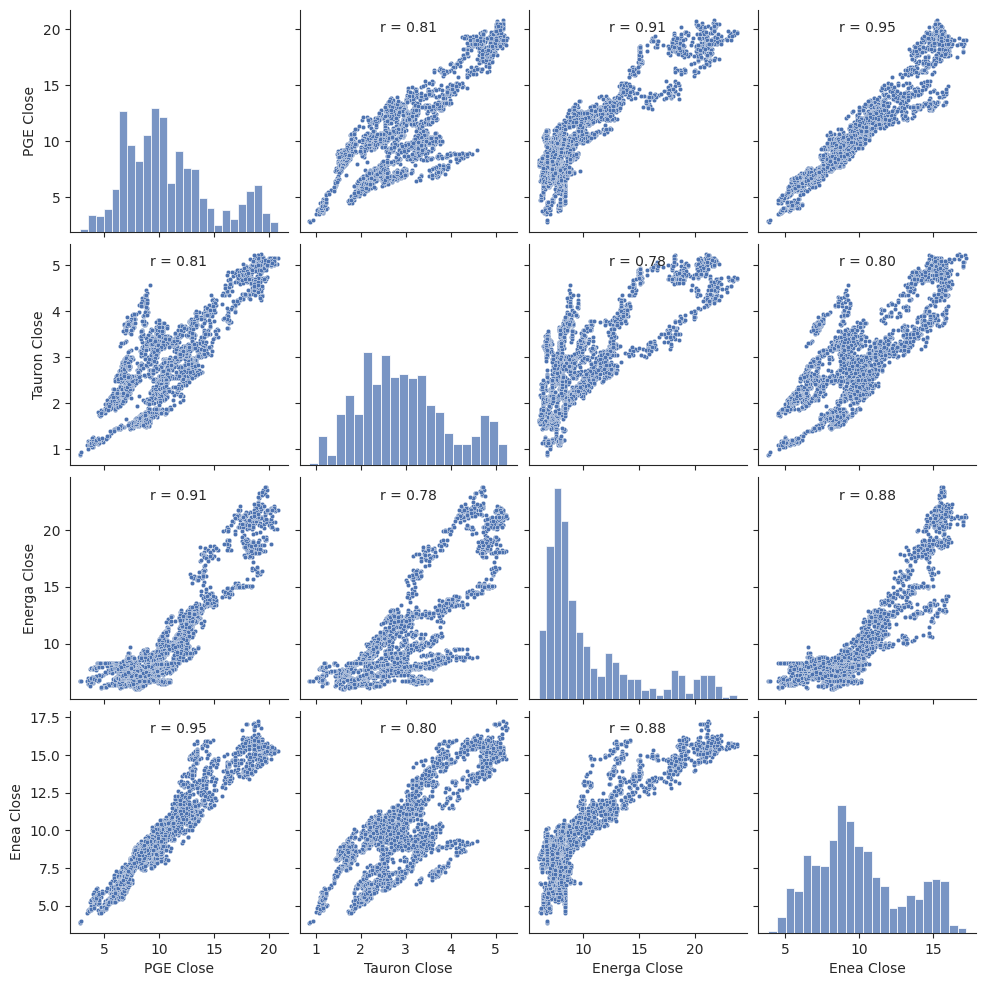

In [48]:
scatter_data = pd.concat([pge['Close'], tauron['Close'], energa['Close'], enea['Close']], axis = 1)
scatter_data.columns = ['PGE', 'Tauron', 'Energa', 'Enea']

correlation_matrix = scatter_data.corr()

scatter_matrix = sns.pairplot(scatter_data, kind='scatter', diag_kind='hist', plot_kws={'s': 10})

for i, (ax, coef) in enumerate(zip(scatter_matrix.axes.flat, correlation_matrix.values.flatten())):
    if i % (len(scatter_data.columns) + 1) != 0:
        ax.annotate(f"r = {coef:.2f}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center')

plt.show()


---
# **Machine Learning Prediction**

Adding a bonus to our analysis: implementing an LSTM-based machine learning model for stock price prediction. LSTM's strength in capturing time-dependent patterns will enhance our forecasting capabilities using historical stock data.

---


In [59]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

We'll train our model using PGE stock data, starting with an assessment of the correlation concerning the close price.

In [58]:
pge_correlation = pge.corr()
print(pge_correlation["Close"].sort_values(ascending = False))

Close     1.000000
High      0.999283
Low       0.999220
Open      0.998184
Cap       0.482118
Volume   -0.055476
Name: Close, dtype: float64


<ipython-input-58-8ffe644d31ca>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [60]:
x = pge[["Open", "High", "Low", "Volume"]]
y = pge["Close"]
x = x.to_numpy()
y = y.to_numpy()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2005/2005 [==============================] - 23s 9ms/step - loss: 1.6178
Epoch 2/30
2005/2005 [==============================] - 18s 9ms/step - loss: 0.1489
Epoch 3/30
2005/2005 [==============================] - 18s 9ms/step - loss: 0.1426
Epoch 4/30
2005/2005 [==============================] - 24s 12ms/step - loss: 0.1485
Epoch 5/30
2005/2005 [==============================] - 18s 9ms/step - loss: 0.1164
Epoch 6/30
2005/2005 [==============================] - 18s 9ms/step - loss: 0.1228
Epoch 7/30
2005/2005 [==============================] - 19s 9ms/step - loss: 0.0820
Epoch 8/30
2005/2005 [==============================] - 20s 10ms/step - loss: 0.0726
Epoch 9/30
2005/2005 [==============================] - 19s 10ms/step - loss: 0.0705
Epoch 10/30
2005/2005 [==============================] - 18s 9ms/step - loss: 0.0633
Epoch 11/30
2005/2005 [==============================] - 17s 9ms/step - loss: 0.0581
Epoch 12/30
2005/2005 [==============================] - 18s 9ms/step -

Our model has showcased impressive accuracy, accurately predicting prices with a minimal loss of 0.0435 by the 30th epoch.


In [75]:
ypredict = model.predict(xtest)

ypredict = ypredict.flatten()


fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(len(ytest))), y=ytest, mode='lines+markers', name='True Value'))

fig.add_trace(go.Scatter(x=list(range(len(ypredict))), y=ypredict, mode='lines+markers', opacity = 0.5, name='LSTM Value'))

fig.update_layout(
    title='Prediction by LSTM',
    xaxis=dict(title='Time Scale'),
    yaxis=dict(title='Scaled to PLN'),
    legend=dict(x=0, y=1, traceorder='normal', orientation='h')
)


16/16 [==============================] - 0s 7ms/step
